In [1]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Filter for data analyst data
df_DA = df[df['job_title_short'] == 'data Analyst'].copy()


c:\Users\revan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: xlabel='job_posted_month'>

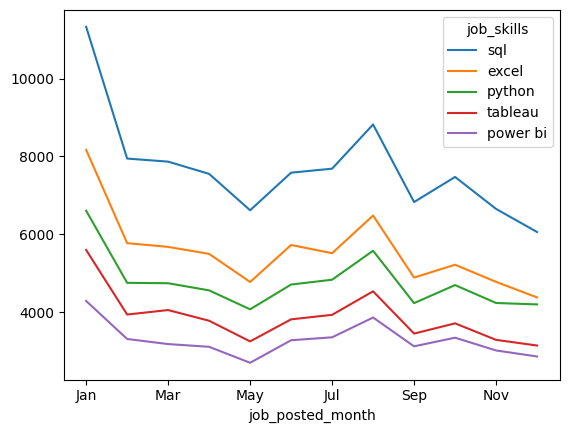

In [4]:
df_DA = df[df['job_title_short'] == "Data Analyst"].copy()
#create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

#Explode the job_skills column and pivot
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',aggfunc='size', fill_value=0)

#sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

#use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x,format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

#Get the top 5 skills
df_DA_pivot.iloc[:,:5].plot(kind='line')




<Axes: xlabel='job_posted_month'>

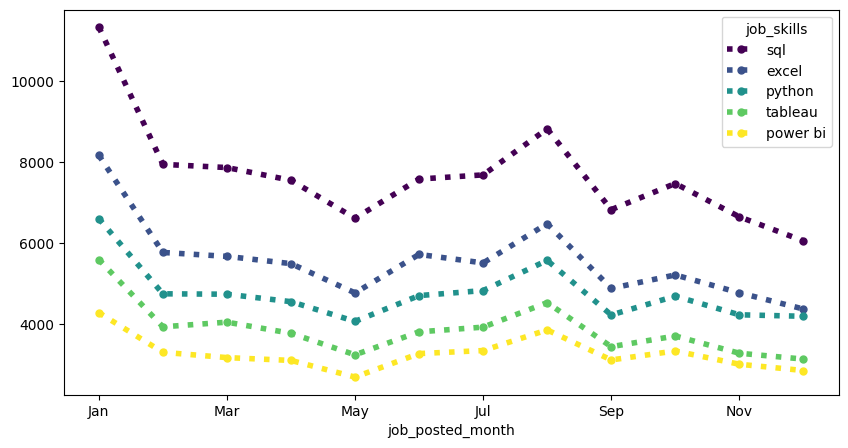

In [13]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth =4,
    linestyle = ':',  #options: '-', '--', '-.', ':'
    colormap='viridis',
    marker ='o',
    markersize=5,
    figsize=(10,5)
)

In [17]:
#explode the 'job_skills' into individual rows
df_exploded = df_DA.explode('job_skills')

#cal the avg salary and count of job postings per skill
skills_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary =('salary_year_avg','median')
)

#Limit to the top skills
skill_count = 20
skills_stats = skills_stats.sort_values(by='skill_count',ascending=False).head(skill_count)
skills_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


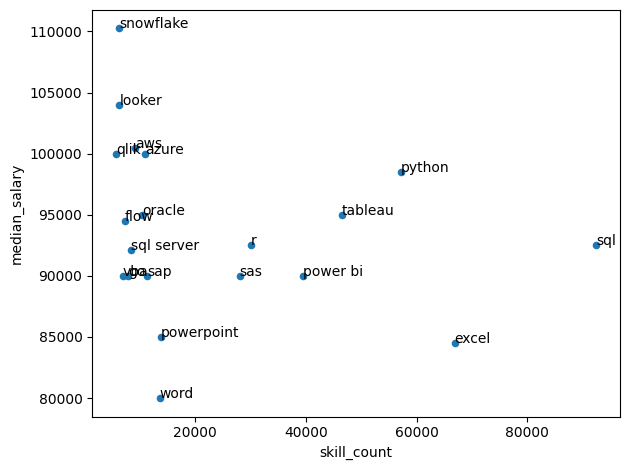

In [20]:
skills_stats.plot(kind='scatter',x="skill_count",y="median_salary")

plt.tight_layout()

for i,txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)


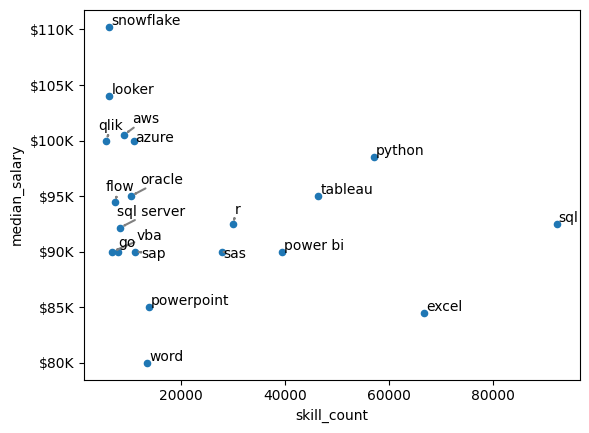

In [42]:
from adjustText import adjust_text

# fig,ax = plt.subplots()

skills_stats.plot(kind='scatter',x="skill_count",y="median_salary")

# plt.tight_layout()

texts =[]
for i,txt in enumerate(skills_stats.index):
    texts.append(plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1.5))
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))